# Principal Component Analysis

## import library

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [34]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

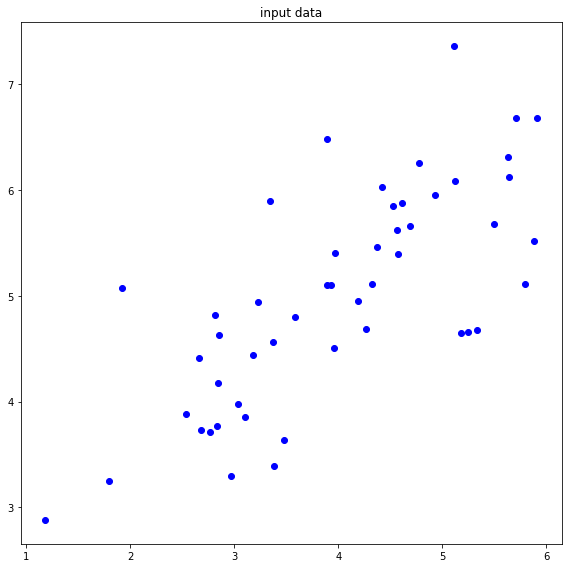

In [35]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [47]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #nom = standard deviation
    mean = np.mean(feature,axis=0)
    nom = np.std(feature, axis = 0)
    # print("feature shape",feature.shape)
    # print("mean shape", mean.shape)
    # print("nom shape", nom.shape)
    feature_normalize = (feature-mean)/nom
    # print("feature_normalize shape",  feature_normalize.shape)
    # print("mean",mean)
    # print("nom", nom)
    # print("feature_normalize", feature_normalize)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [6]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [70]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # Z_feature = normalize(feature)
    Sigma = np.dot(feature.T, feature)/feature.shape[0]
    # print("Sigma shape",Sigma.shape)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [71]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    eigen_val, eigen_vec = np.linalg.eig(compute_covariance(feature))
    lamda = eigen_val.argsort()[::-1]
    eigen_val = eigen_val[lamda]
    eigen_vec = eigen_vec[lamda]
    print("eigen_val shape:",eigen_val.shape)
    print("eigen_vec shape", eigen_vec.shape)
    print("eigen_val", eigen_val)
    print("eigen_vector", eigen_vec)
    principal_component_1 = eigen_val[0]*eigen_vec.T[0]
    principal_component_2 = eigen_val[1]*eigen_vec.T[1]
    print("principal_component_1",principal_component_1)
    print("principal_component_2",principal_component_2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [85]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    projection = np.dot(feature,vector.T)
    print(projection.shape)
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [87]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)
print(projection1)
print(projection2)

eigen_val shape: (2,)
eigen_vec shape (2, 2)
eigen_val [1.73553 0.26447]
eigen_vector [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
principal_component_1 [1.22720503 1.22720503]
principal_component_2 [-0.18700853  0.18700853]
(50,)
(50,)
[-2.59690084  1.60047883 -2.1249767  -2.85297993 -2.20970777  1.69529635
 -2.202054    4.06371568  0.0520508   1.35670009  1.09629252  0.95940465
  0.1556365   0.91264303 -2.71463319  3.32544927  1.53906184 -1.65929327
  4.04371558  0.82947351  3.84848989 -0.67513777  3.0976209  -0.08981939
 -2.8898694  -0.88187851  2.14704353  2.03401607 -1.46168756  0.01203106
  0.39559133  2.6260208  -2.32342626  1.02834506 -1.17855147  2.3481373
 -2.92869324  2.41648263 -4.44282263  0.48334635  1.69522064 -1.54149664
 -2.25039862  1.71759691 -3.14603172  0.47200129 -5.54151445 -2.10518112
 -0.63854441  2.50373645]
[-2.00001842e-01  7.04138844e-02  1.05702994e-01 -4.05180031e-02
  3.13128471e-02  2.90094354e-01 -1.70188717e-01  2.06189759e-04
  2.73773519e-

---

---

## functions for presenting the results

---

---

In [57]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [110]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x0 = feature[:,0]
    y0 = feature[:,1]
    plt.scatter(x0, y0, color='blue')
    plt.quiver([0,0],[0,0], principal_component_1[0], principal_component_1[1], color = ["r"], scale = 5)
    plt.quiver([0,0],[0,0], principal_component_2[0], principal_component_2[1], color = ["g"], scale = 5)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [67]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [68]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [69]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [70]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [71]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [72]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


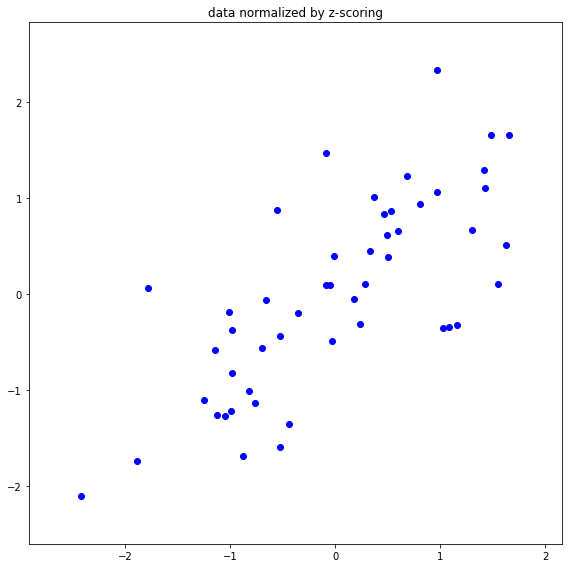

**************************************************
## [RESULT 02]
**************************************************


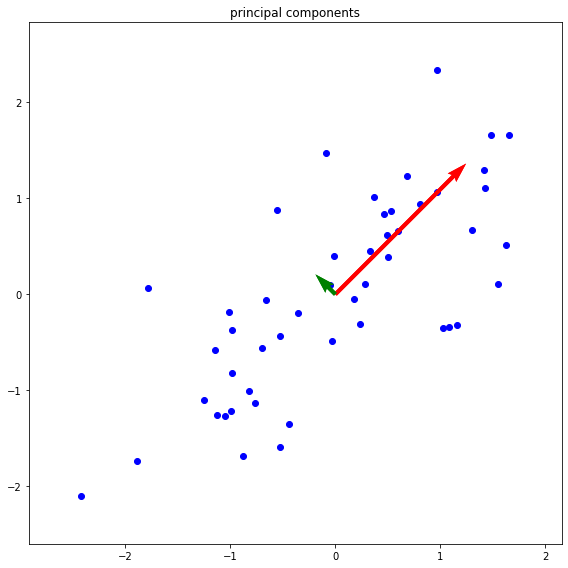

**************************************************
## [RESULT 03]
**************************************************


NameError: name 'function_result_03' is not defined

In [111]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)